In [1]:
import pickle
from pathlib import Path

import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances, cosine_distances
import ipyplot
import cv2

In [2]:
def read_pickle(pickle_file_path):
    with open(pickle_file_path, "rb") as pklfile:
        return pickle.load(pklfile)

In [3]:
pd.options.display.max_colwidth = None

In [4]:
%matplotlib widget

In [5]:
TRAIN_DATA1_PATH = "F:/skripsi/FAS-Skripsi-4/embedding_data/ssdg_feature_mining_loss_lambda_2_OCItoM/oulu_npu.pkl"
TRAIN_DATA2_PATH = "F:/skripsi/FAS-Skripsi-4/embedding_data/ssdg_feature_mining_loss_lambda_2_OCItoM/casia_mfsd.pkl"
TRAIN_DATA3_PATH = "F:/skripsi/FAS-Skripsi-4/embedding_data/ssdg_feature_mining_loss_lambda_2_OCItoM/replay_attack.pkl"
TEST_DATA_PATH = "F:/skripsi/FAS-Skripsi-4/embedding_data/ssdg_feature_mining_loss_lambda_2_OCItoM/msu_mfsd.pkl"

In [6]:
train_data1 = read_pickle(TRAIN_DATA1_PATH)
train_img_paths1 = np.unique(np.asarray(train_data1['img_paths']))
train_embs1 = np.asarray(train_data1['main_embs'])
train_labels1 = np.asarray(train_data1['labels'])
# train_attack_types1 = np.asarray(train_data1['attack_types'])

train_data2 = read_pickle(TRAIN_DATA2_PATH)
train_img_paths2 = np.unique(np.asarray(train_data2['img_paths']))
train_embs2 = np.asarray(train_data2['main_embs'])
train_labels2 = np.asarray(train_data2['labels'])
# train_attack_types2 = np.asarray(train_data2['attack_types'])

train_data3 = read_pickle(TRAIN_DATA3_PATH)
train_img_paths3 = np.unique(np.asarray(train_data3['img_paths']))
train_embs3 = np.asarray(train_data3['main_embs'])
train_labels3 = np.asarray(train_data3['labels'])
# train_attack_types3 = np.asarray(train_data3['attack_types'])

test_data = read_pickle(TEST_DATA_PATH)
test_img_paths = np.unique(np.asarray(test_data['img_paths']))
test_embs = np.asarray(test_data['main_embs'])
test_labels = np.asarray(test_data['labels'])
# test_attack_types = np.asarray(test_data['attack_types'])

tsne2d = TSNE(
    n_components=2,
    perplexity=50,
    early_exaggeration=15.0,
    learning_rate='auto',
    init='pca',
    random_state=666,
    n_jobs=-1
)

all_embs = np.concatenate((train_embs1, train_embs2, train_embs3, test_embs), axis=0)
all_img_paths = np.concatenate((train_img_paths1, train_img_paths2, train_img_paths3, test_img_paths), axis=0)

tsne_embs = tsne2d.fit_transform(all_embs)

tsne_train1 = tsne_embs[:train_embs1.shape[0]]
tsne_train2 = tsne_embs[train_embs1.shape[0]:train_embs1.shape[0]+train_embs2.shape[0]]
tsne_train3 = tsne_embs[train_embs1.shape[0]+train_embs2.shape[0]:train_embs1.shape[0]+train_embs2.shape[0]+train_embs3.shape[0]]
tsne_test = tsne_embs[train_embs1.shape[0]+train_embs2.shape[0]+train_embs3.shape[0]:]

tsne_train1_live = tsne_train1[train_labels1 == 1]
tsne_train1_spoof = tsne_train1[train_labels1 == 0]
tsne_train2_live = tsne_train2[train_labels2 == 1]
tsne_train2_spoof = tsne_train2[train_labels2 == 0]
tsne_train3_live = tsne_train3[train_labels3 == 1]
tsne_train3_spoof = tsne_train3[train_labels3 == 0]

tsne_test_live = tsne_test[test_labels == 1]
tsne_test_spoof = tsne_test[test_labels == 0]

# tsne_train1_print = tsne_train1[train_attack_types1 == 1]
# tsne_train1_cutout = tsne_train1[train_attack_types1 == 2]
# tsne_train1_screen = tsne_train1[train_attack_types1 == 3]
# tsne_train2_print = tsne_train2[train_attack_types2 == 1]
# tsne_train2_cutout = tsne_train2[train_attack_types2 == 2]
# tsne_train2_screen = tsne_train2[train_attack_types2 == 3]
# tsne_train3_print = tsne_train3[train_attack_types3 == 1]
# tsne_train3_cutout = tsne_train3[train_attack_types3 == 2]
# tsne_train3_screen = tsne_train3[train_attack_types3 == 3]
# tsne_test_print = tsne_test[test_attack_types == 1]
# tsne_test_cutout = tsne_test[test_attack_types == 2]
# tsne_test_screen = tsne_test[test_attack_types == 3]

In [7]:
# fig, ax = plt.subplots()

# ax.scatter(tsne_train1_live[:200, 0],  tsne_train1_live[:200, 1], c="green", s=2, label="real")
# ax.scatter(tsne_train1_print[:200, 0], tsne_train1_print[:200, 1], c="blue", s=2, label="print")
# ax.scatter(tsne_train1_cutout[:200, 0], tsne_train1_cutout[:200, 1], c="purple", s=2, label="cutout")
# ax.scatter(tsne_train1_screen[:200, 0], tsne_train1_screen[:200, 1], c="orange", s=2, label="screen")

# ax.scatter(tsne_train2_live[:200, 0],  tsne_train2_live[:200, 1], c="green", s=2)
# ax.scatter(tsne_train2_print[:200, 0], tsne_train2_print[:200, 1], c="blue", s=2)
# ax.scatter(tsne_train2_cutout[:200, 0], tsne_train2_cutout[:200, 1], c="purple", s=2)
# ax.scatter(tsne_train2_screen[:200, 0], tsne_train2_screen[:200, 1], c="orange", s=2)

# ax.scatter(tsne_train3_live[:200, 0],  tsne_train3_live[:200, 1], c="green", s=2)
# ax.scatter(tsne_train3_print[:200, 0], tsne_train3_print[:200, 1], c="blue", s=2)
# ax.scatter(tsne_train3_cutout[:200, 0], tsne_train3_cutout[:200, 1], c="purple", s=2)
# ax.scatter(tsne_train3_screen[:200, 0], tsne_train3_screen[:200, 1], c="orange", s=2)

# ax.scatter(tsne_test_live[:200, 0], tsne_test_live[:200, 1], c="green", s=2)
# ax.scatter(tsne_test_print[:200, 0], tsne_test_print[:200, 1], c="blue", s=2)
# ax.scatter(tsne_test_cutout[:200, 0], tsne_test_cutout[:200, 1], c="purple", s=2)
# ax.scatter(tsne_test_screen[:200, 0], tsne_test_screen[:200, 1], c="orange", s=2)

# ax.legend()
# ax.axis("off")
# ax.set_title(f"SSDG-R OCItoM t-SNE")

Text(0.5, 1.0, 'MADDG OCItoM t-SNE')

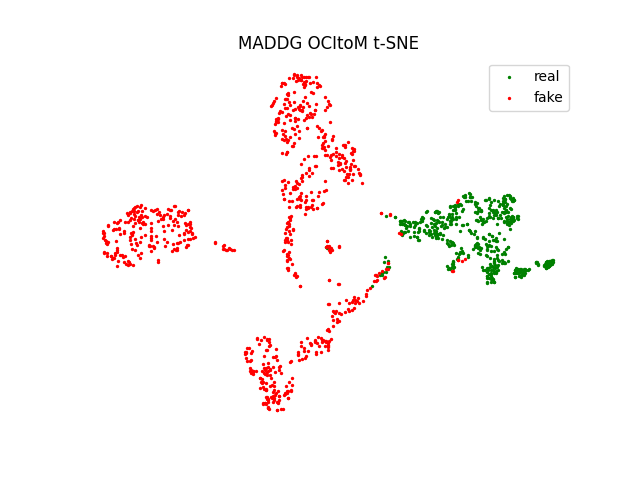

In [8]:
fig, ax = plt.subplots()

ax.scatter(tsne_train1_live[:200, 0],  tsne_train1_live[:200, 1], c="green", s=2, label="real")
ax.scatter(tsne_train1_spoof[:200, 0], tsne_train1_spoof[:200, 1], c="red", s=2, label="fake")

ax.scatter(tsne_train2_live[:200, 0],  tsne_train2_live[:200, 1], c="green", s=2)
ax.scatter(tsne_train2_spoof[:200, 0], tsne_train2_spoof[:200, 1], c="red", s=2)

ax.scatter(tsne_train3_live[:200, 0],  tsne_train3_live[:200, 1], c="green", s=2)
ax.scatter(tsne_train3_spoof[:200, 0], tsne_train3_spoof[:200, 1], c="red", s=2)

ax.scatter(tsne_test_live[:200, 0], tsne_test_live[:200, 1], c="green", s=2)
ax.scatter(tsne_test_spoof[:200, 0], tsne_test_spoof[:200, 1], c="red", s=2)

ax.legend()
ax.axis("off")
ax.set_title(f"MADDG OCItoM t-SNE")

Text(0.5, 1.0, 'MADDG OCItoM t-SNE')

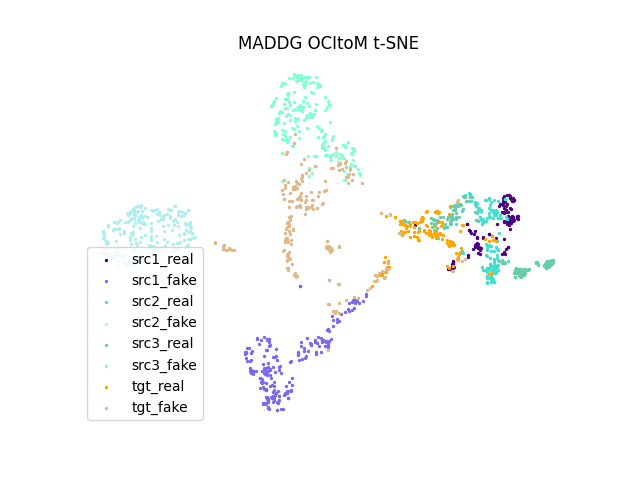

In [9]:
fig, ax = plt.subplots()

ax.scatter(tsne_train1_live[:200, 0],  tsne_train1_live[:200, 1], c="indigo", s=2, label="src1_real")
ax.scatter(tsne_train1_spoof[:200, 0], tsne_train1_spoof[:200, 1], c="mediumslateblue", s=2, label="src1_fake")

ax.scatter(tsne_train2_live[:200, 0],  tsne_train2_live[:200, 1], c="turquoise", s=2, label="src2_real")
ax.scatter(tsne_train2_spoof[:200, 0], tsne_train2_spoof[:200, 1], c="paleturquoise", s=2, label="src2_fake")

ax.scatter(tsne_train3_live[:200, 0],  tsne_train3_live[:200, 1], c="mediumaquamarine", s=2, label="src3_real")
ax.scatter(tsne_train3_spoof[:200, 0], tsne_train3_spoof[:200, 1], c="aquamarine", s=2, label="src3_fake")

ax.scatter(tsne_test_live[:200, 0], tsne_test_live[:200, 1], c="orange", s=2, label="tgt_real")
ax.scatter(tsne_test_spoof[:200, 0], tsne_test_spoof[:200, 1], c="burlywood", s=2, label="tgt_fake")

ax.legend()
ax.axis("off")
ax.set_title(f"MADDG OCItoM t-SNE")

c:\Users\goldi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipyplot\_utils.py:97: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.asarray(seq)



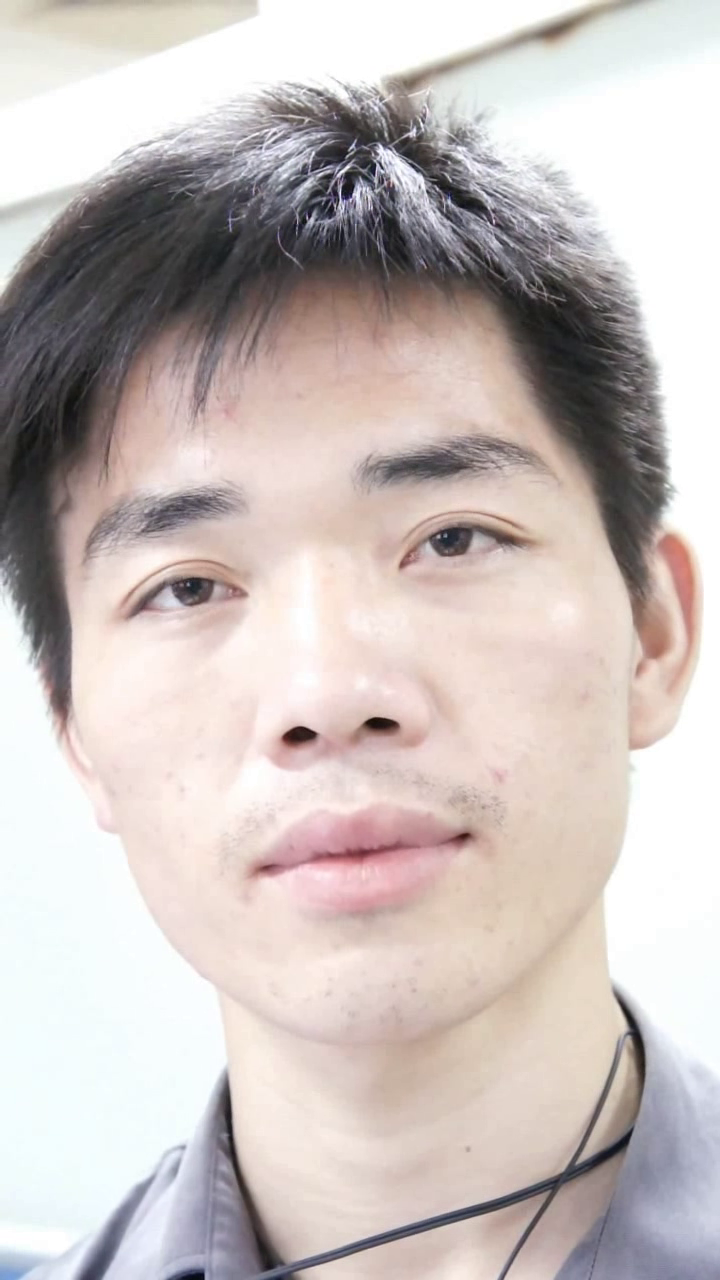
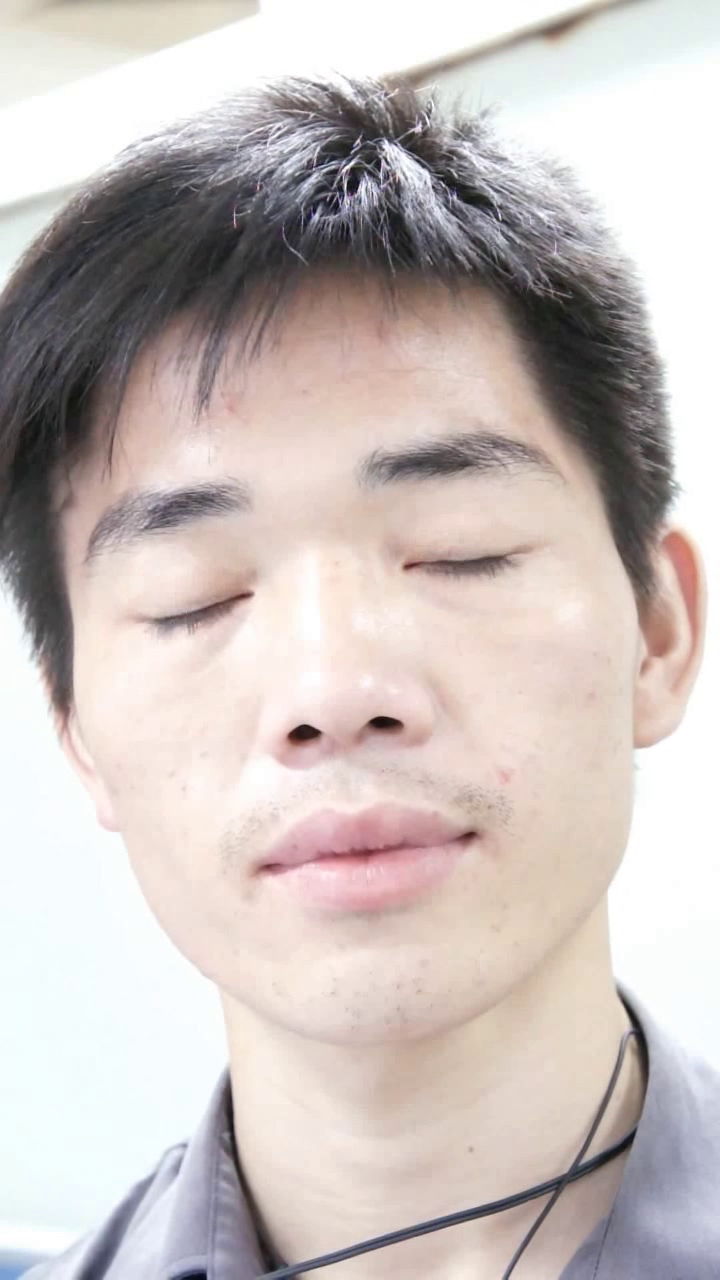
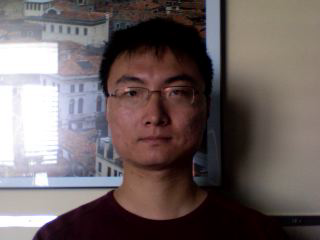
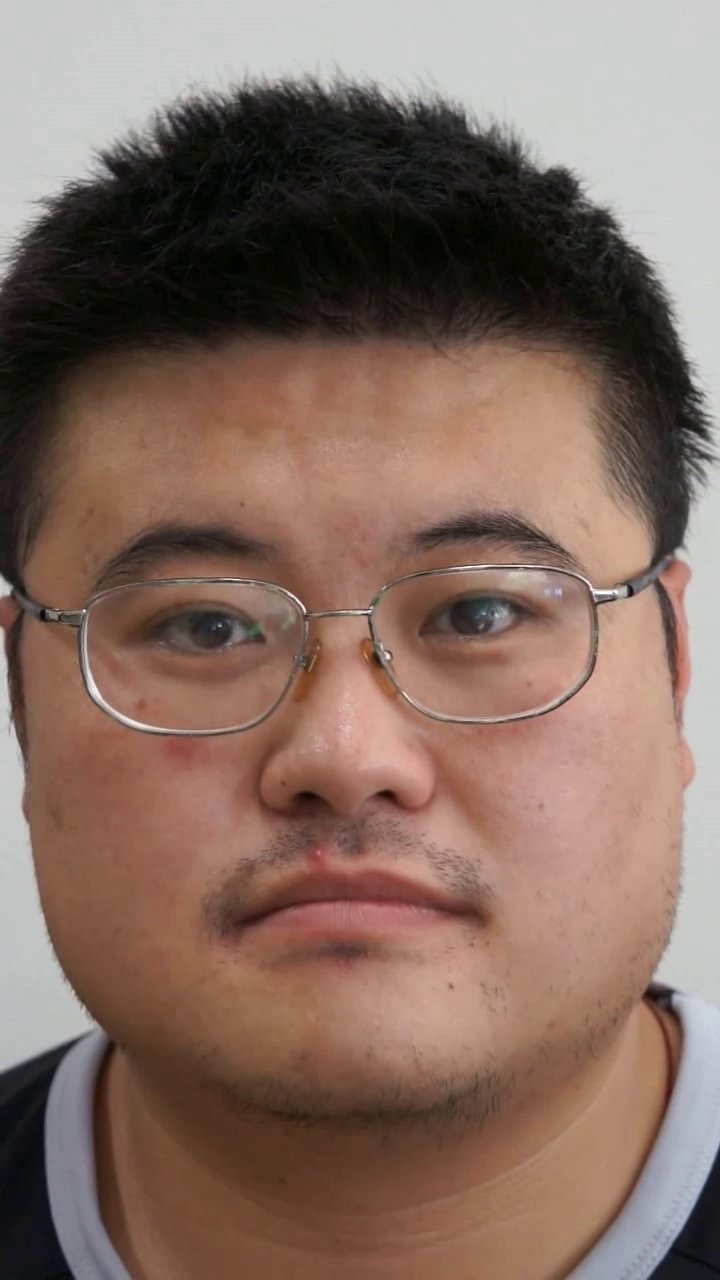
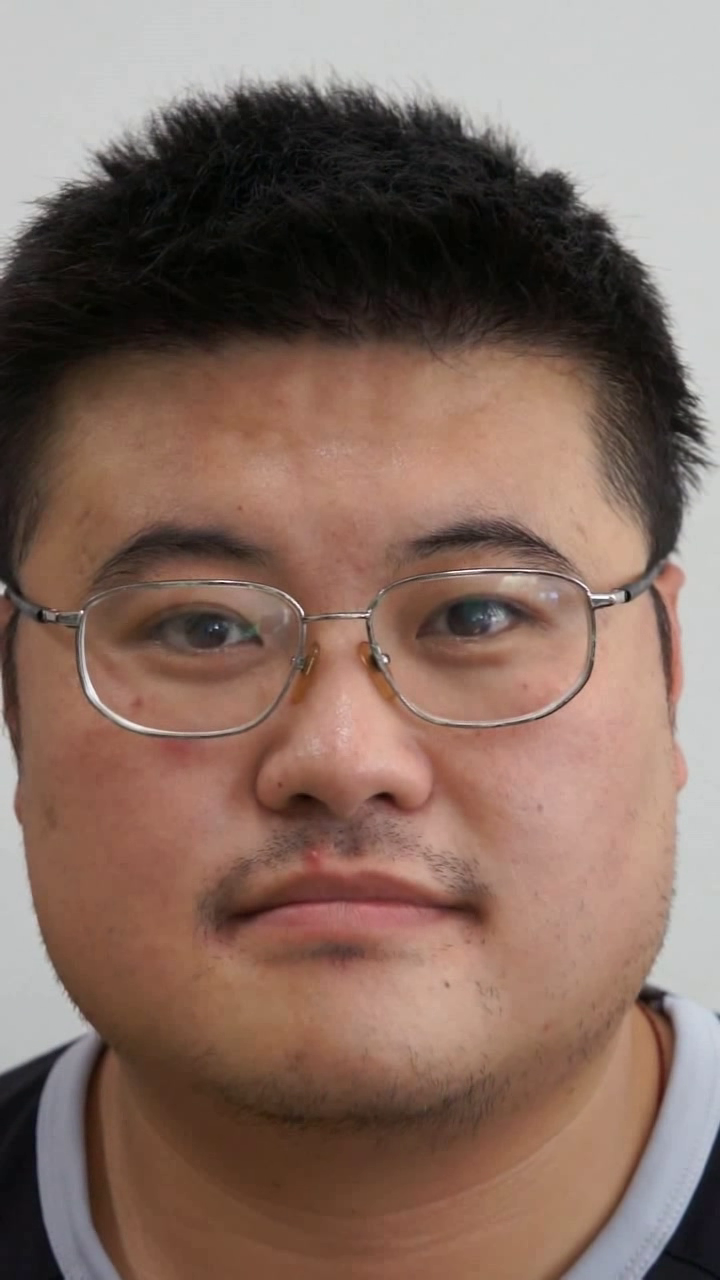
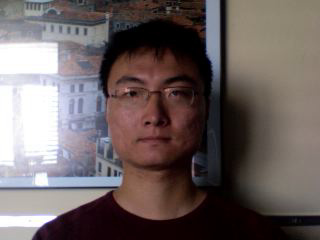


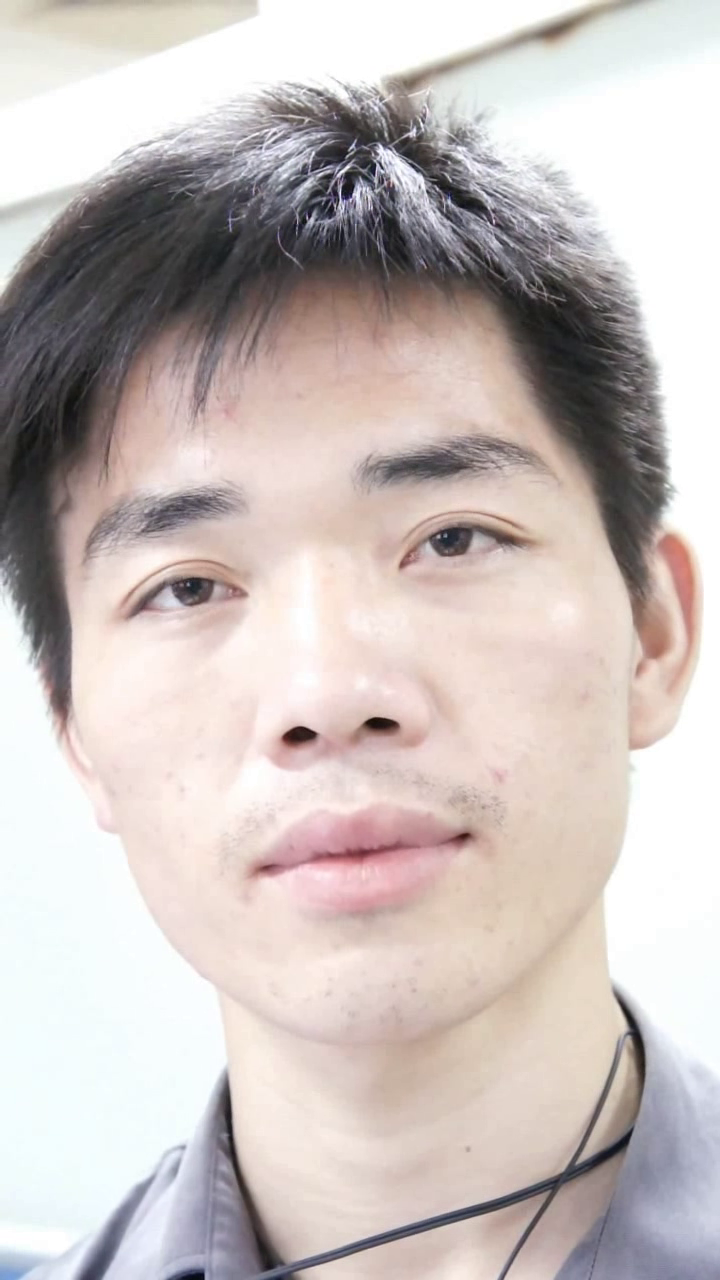
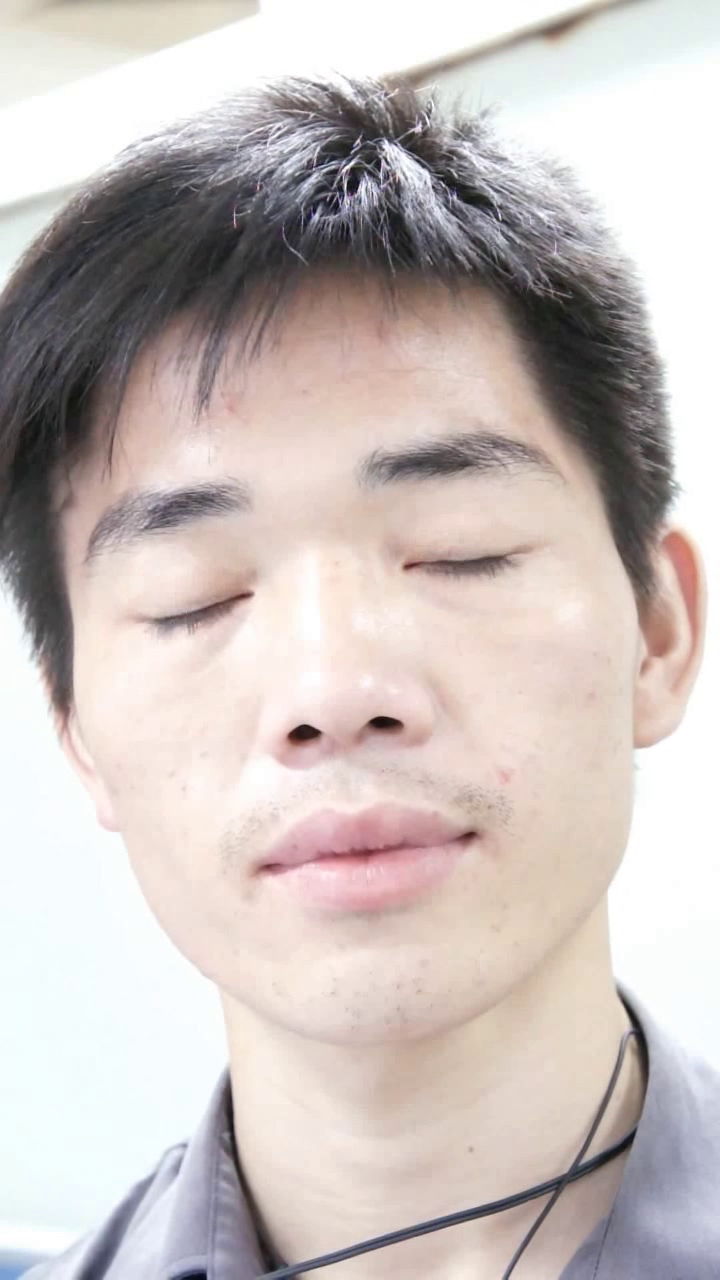
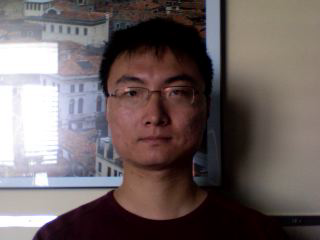
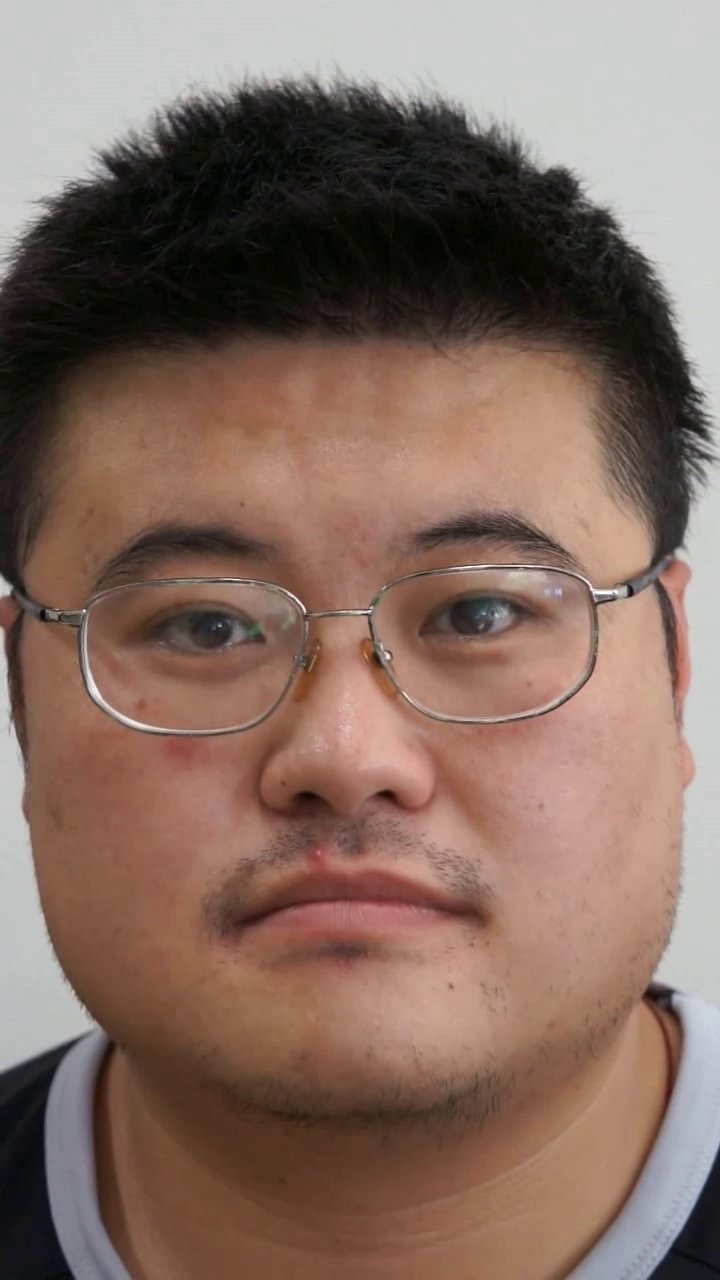
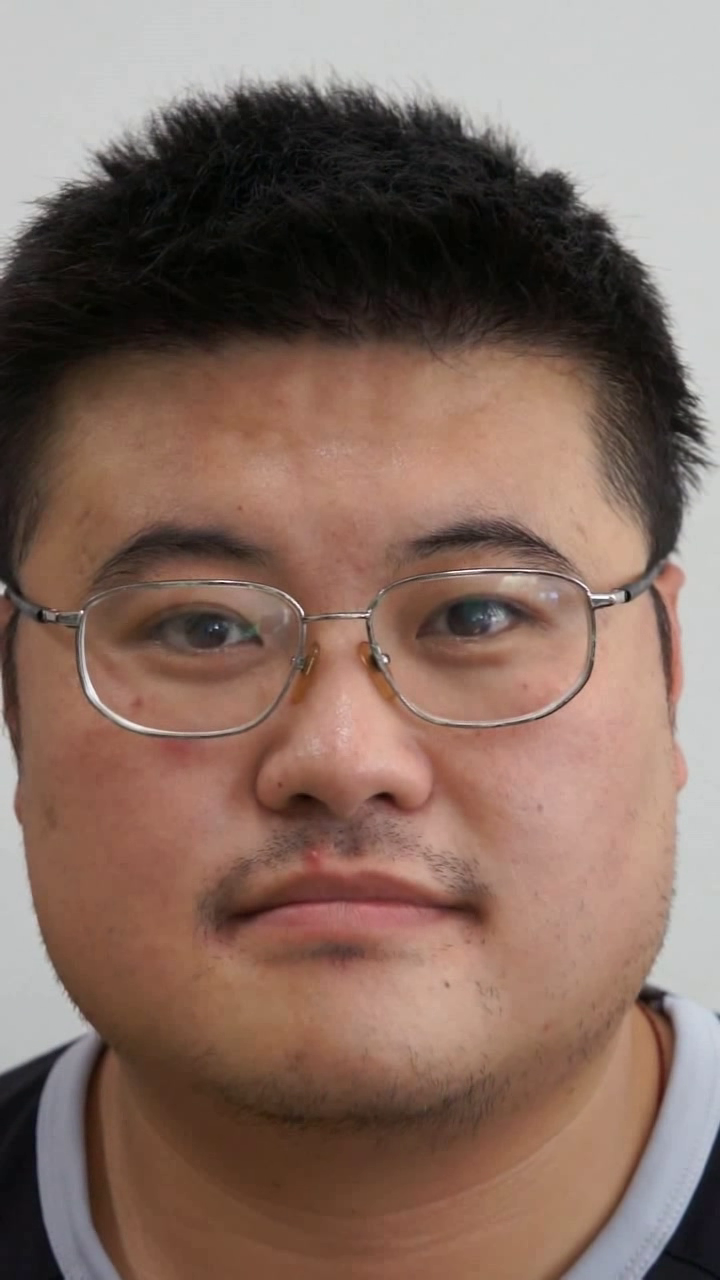
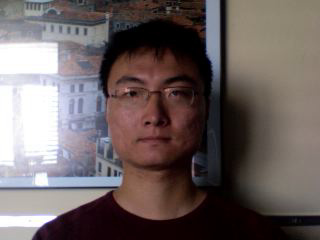

In [10]:
query_coordinates = [
   (39.3, 11.3),
]
num_nearest = 5
all_img_paths_temp = all_img_paths.copy()

for q_coord in query_coordinates:
   img_list = []
   label_list = []
   dist = euclidean_distances(np.array([q_coord]), tsne_embs).ravel()
   
   for i in range(num_nearest+1):
      result_index = dist.argmin()
      # print(str(all_img_paths_temp[result_index]).lower())

      if i == 0:
         label_list.append(f"(Query)")
      else:
         label_list.append(f"({i})")
      img = cv2.imread(str(all_img_paths_temp[result_index]))
      # img = cv2.resize(img, (720, 480))
      img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      img_list.append(img)
      all_img_paths_temp = np.delete(all_img_paths_temp, [result_index])
      dist = np.delete(dist, [result_index])

   ipyplot.plot_images(img_list, label_list)